# Exercise 5 - IART - Supervised Learning

Author: Luis Paulo Reis - University of Porto/LIACC

Exercise: Iris flower extended data set – Classification using different Algorithms

Continuing with the Iris dataset, suppose that we have Iris already identified in the 3 classes but now we have also the Iris packed in different types of packages: “Simple – 0”, “Gift – 1” and “Luxury – 2”. We also have a new variable “price” with three possibilities: “Low”, “Medium”, “High”. 
 
We have now a different classification problem in which we want to predict the “price” classification based on the remaining characteristics: sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm, iris_type, and package.

a) Start by importing all the needed libraries (numpy, pandas, scikitlearn, matplotlib and seaborn)

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

b) Read the iris-data-new2.csv using Pandas

In [29]:
iris_data2 = pd.read_csv('iris-data-new2.csv')

c) Analize the data using the head(), describe(), and other Pandas commands. 

In [30]:
iris_data2.head(5)
#iris_data2.head(10)
#iris_data2.tail(10)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,iris_type,package,price
0,5.1,3.5,1.4,0.2,Iris-setosa,2,Medium
1,4.9,3.0,1.4,0.2,Iris-setosa,1,Low
2,4.7,3.2,1.3,0.2,Iris-setosa,0,Low
3,4.6,3.1,1.5,0.2,Iris-setosa,0,Low
4,5.0,3.6,1.4,0.2,Iris-setosa,0,Low


In [31]:
iris_data2.describe()
#iris_data2.describe(include=['number'])

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,package
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.847651,3.059732,3.775168,1.209732,0.442953
std,0.799542,0.430104,1.758720,0.762191,0.710753
min,4.400000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [32]:
# Some functions to test
iris_data2.dtypes
#iris_data2.axes
#iris_data2.shape
#iris_data2.ndim
#iris_data2.values

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
iris_type           object
package              int64
price               object
dtype: object

d) Create a dataset including as inputs the attributes: 'sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm' and as output the 'price'

In [33]:
all_inputs = iris_data2[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_labels = iris_data2['price'].values

print(all_inputs[:5])
print(all_labels[:5])
#all_inputs[:5]
#all_labels[:5]

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['Medium' 'Low' 'Low' 'Low' 'Low']


e)	Using only the attribute sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm, fit a decision tree model using stratified cross validation (10 folds) with grid search for classifying the price. 

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

dct1 = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5, 6],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(dct1,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8042857142857143
Best parameters: {'criterion': 'gini', 'max_depth': 2, 'max_features': 4, 'splitter': 'best'}


In [35]:
dct1 = grid_search.best_estimator_
print(dct1.score(all_inputs,all_labels))

0.8456375838926175


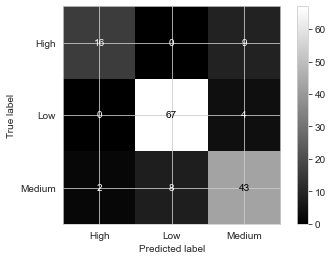

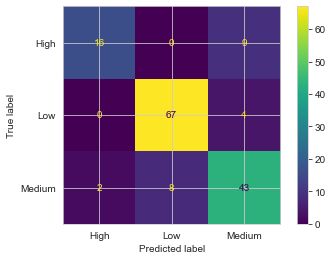

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred = dct1.predict(all_inputs)
cm = confusion_matrix(all_labels, pred, labels=dct1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dct1.classes_)
disp.plot(cmap='gist_gray')
disp.plot()

In [37]:
iris_data2['iris_type'] = pd.Categorical(iris_data2['iris_type']).codes


In [38]:

all_inputs = iris_data2[['sepal_length_cm', 'sepal_width_cm',
                         'petal_length_cm', 'petal_width_cm', 
                         'iris_type', 'package']].values

all_labels = iris_data2['price'].values

print(all_inputs[:5])
print(all_labels[:5])
#print(all_inputs[:149])
#print(all_labels[:149])

[[5.1 3.5 1.4 0.2 0.  2. ]
 [4.9 3.  1.4 0.2 0.  1. ]
 [4.7 3.2 1.3 0.2 0.  0. ]
 [4.6 3.1 1.5 0.2 0.  0. ]
 [5.  3.6 1.4 0.2 0.  0. ]]
['Medium' 'Low' 'Low' 'Low' 'Low']


In [43]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5, 6, 7],
                  'max_features': [1, 2, 3, 4, 5, 6]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(dtc,param_grid=parameter_grid,cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
bestdct = grid_search.best_estimator_
print(bestdct)


Best score: 0.9185714285714287
Best parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 2, 'splitter': 'random'}
DecisionTreeClassifier(max_depth=6, max_features=2, splitter='random')


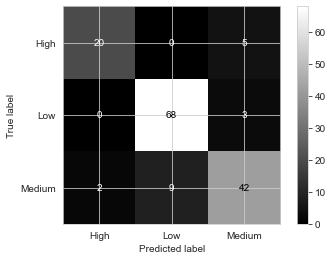

In [45]:
pred = bestdct.predict(all_inputs)
cm = confusion_matrix(all_labels, pred, labels=bestdct.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bestdct.classes_)
disp.plot(cmap='gist_gray')

In [53]:
#Training with Cross Validation
from sklearn.svm import SVC 
#svm = SVC()
svm = SVC(kernel='poly', gamma='auto')
scores = cross_val_score(svm, all_inputs, all_labels, cv=10)
print("SVC:",scores.mean())

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
scores = cross_val_score(gnb, all_inputs, all_labels, cv=10)
print("NB: ",scores.mean())

from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
#knn = neighbors.KNeighborsClassifier()
scores = cross_val_score(knn, all_inputs, all_labels, cv=10)
print("kNN: ",scores.mean())

from sklearn.neural_network import MLPClassifier
#mlp = MLPClassifier(solver='lbfgs', alpha=1e-4, max_iter=1000)
#mlp = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(25), random_state=1, max_iter=10000)
mlp = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(25), random_state=1, max_iter=10000)
scores = cross_val_score(mlp, all_inputs, all_labels, cv=10)
print("MLP: ",scores.mean())

SVC: 0.9328571428571429
NB:  0.6961904761904762
kNN:  0.8652380952380954
MLP:  0.971904761904762


Example: Training with all data makes the model get 100% score but it will not generalize to new examples

In [54]:
#Training with all data makes the model get 100% score 

knn.fit(all_inputs,all_labels)
print(knn.score(all_inputs,all_labels))
pred = knn.predict(all_inputs)
print(pred[:10])
print(all_labels[:10])

svm.fit(all_inputs,all_labels)
print(svm.score(all_inputs,all_labels))
pred = svm.predict(all_inputs)
print(pred[:10])
print(all_labels[:10])

mlp.fit(all_inputs,all_labels)
print(mlp.score(all_inputs,all_labels))
pred = mlp.predict(all_inputs)
print(pred[:10])
print(all_labels[:10])

1.0
['Medium' 'Low' 'Low' 'Low' 'Low' 'Low' 'Medium' 'Low' 'Low' 'Low']
['Medium' 'Low' 'Low' 'Low' 'Low' 'Low' 'Medium' 'Low' 'Low' 'Low']
1.0
['Medium' 'Low' 'Low' 'Low' 'Low' 'Low' 'Medium' 'Low' 'Low' 'Low']
['Medium' 'Low' 'Low' 'Low' 'Low' 'Low' 'Medium' 'Low' 'Low' 'Low']
1.0
['Medium' 'Low' 'Low' 'Low' 'Low' 'Low' 'Medium' 'Low' 'Low' 'Low']
['Medium' 'Low' 'Low' 'Low' 'Low' 'Low' 'Medium' 'Low' 'Low' 'Low']


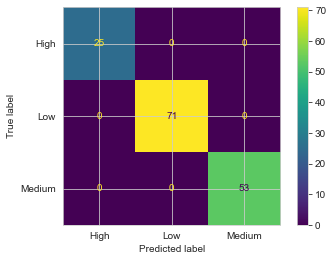

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(all_labels, pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()